# **Description**


For the CXPT501 final project, you will explore a large dataset that we simulated and modified based on a clinical trial (PIONEER-HF, ClinicalTrials.gov Identifier: NCT02554890).

In this study, researchers compared the effects of sacubitril/valsartan versus enalapril in stabilized acute heart failure patients with reduced ejection fraction.



##*Information included in the dataset*:

*Demographics*
*   Age
*   Sex
*   Race
*   Ethnicity

*Baseline characteristics*
*   Height (cm)
*   Weight (kg)
*   Smoking history
*   Pre-treatment NT-proBNP (pg/mL)
*   Pre-treatment BNP (pg/mL)

*Disease characteristics*
*   Prior use of ACEi/ARB
*   Left ventricular ejection fraction (%)
*   Chronic renal insufficiency

*Intervention*
*   Sacubitril/valsartan
*   Enalapril

*Efficacy outcome*
*   Week 4 NT-proBNP (pg/mL)
*   Week 8 NT-proBNP (pg/mL)

*Safety outcome*
*   Symptomatic hypotension
*   Hyperkalemia
*   Angioedema
*   Death

# **Instructions**

## **Data import (6 points)**

**Import the Python libraries you decide to use here, e.g. Pandas (2 points)**

In [1]:
#importing libraries to use for analysis
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

**Download/load your individual dataset (.csv file) (2 points)**

We have prepared a dataset for each of you, labeled by name. Please download or directly import your corresponding data file from https://github.com/Mangul-Lab-USC/CXPT-501-Fall_23. Each dataset contains data for 1 million patients, one per row.

For directly importing your file from GitHub to your Colab notebook, click on your assigned file then right-click the Download button. From there, a drop-down menu like below should appear. Select the option that copies the direct link address to your clipboard, then paste it into your notebook.

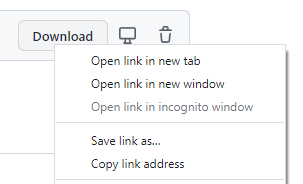

**The drop-down menu shown in Google Chrome.** If you use this web browser, click "Copy link address".

In [2]:
%%bash
rm -r sample_data

In [3]:
%%bash
%%bash
mkdir /content/startingData /content/code /content/results /content/figures

##adding a README.md file to the main repository
touch /content/README.md

##Adding read me files to every repository
for dir in /content/startingData /content/code /content/results /content/figures;do
cat>"$dir/README.md"
done

bash: line 1: fg: no job control


In [4]:
## adding information to read me file
%%bash
cd /content/
cat > /content/README.md

Code (Directory/file): Contains all code utitilized for this project and analysis

Results (Directory/file): Contains all answer and statisically test data and conclusions for Question2_results

Figures (Directory/file): Contains all the figures generated for this project

startingData (directory/file): Contains raw un manipulated data frame files and all clean and manipulated data frame files used in analysis



**Display the dataset (2 points)**

In [5]:
##importing dataset
df=pd.read_csv("https://github.com/Mangul-Lab-USC/CXPT-501-Fall_23/raw/main/Ashley_Michelle_Jauregui.csv")
df

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death
0,58.0,Female,Pacific Islander,Not Hispanic or Latino,156.0,81.0,current,8347.211,6235.367,4657.819,1465.851,Yes,32.984,No,Enalapril,No,No,No
1,29.0,Female,Caucasian,Not Hispanic or Latino,164.0,69.0,never,5343.904,3991.896,2981.946,1979.660,Yes,26.393,No,Enalapril,No,No,No
2,37.0,Male,Other,Hispanic or Latino,158.0,107.0,never,6147.305,4592.037,3430.252,1476.762,Yes,25.579,No,Enalapril,No,No,No
3,66.0,Male,Pacific Islander,Hispanic or Latino,177.0,53.0,former,5400.806,4034.402,3013.698,1569.475,No,36.460,No,Enalapril,No,No,No
4,66.0,Male,Unknown,Not Hispanic or Latino,207.0,86.0,current,6226.814,4651.430,3474.618,1616.645,No,33.842,Yes,Enalapril,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56.0,Male,Asian,Not Hispanic or Latino,183.0,65.0,current,6827.313,3638.958,1939.565,1648.614,No,44.566,Yes,Sacubitril-valsartan,No,No,No
996,22.0,Male,Asian,Hispanic or Latino,192.0,83.0,current,5659.047,3016.272,1607.673,1544.946,No,38.035,Yes,Sacubitril-valsartan,No,No,No
997,65.0,Male,Asian,Not Hispanic or Latino,207.0,85.0,former,6235.085,3323.300,1771.319,1818.102,No,35.753,Yes,Sacubitril-valsartan,No,No,No
998,74.0,Male,Pacific Islander,Not Hispanic or Latino,204.0,62.0,current,7867.514,4193.385,2235.074,1306.662,No,29.379,Yes,Sacubitril-valsartan,No,Yes,No


In [6]:
##creating a CSV file of the raw data
df.to_csv("/content/startingData/raw_data.csv", index=False)

In [7]:
#checking dtypes in data
df.dtypes

Age                                       float64
Sex                                        object
Race                                       object
Ethnicity                                  object
Height (cm)                               float64
Weight (kg)                               float64
Smoking history                            object
Pre-treatment NT-proBNP (pg/mL)           float64
Week 4 NT-proBNP (pg/mL)                  float64
Week 8 NT-proBNP (pg/mL)                  float64
Pre-treatment BNP (pg/mL)                 float64
Prior use of ACEi/ARB                      object
Left ventricular ejection fraction (%)    float64
Chronic renal insufficiency                object
Group                                      object
Symptomatic hypotension                    object
Hyperkalemia                               object
Death                                      object
dtype: object

In [8]:
##checking for NaN values in the dataframe
df.isnull().sum()

Age                                       1
Sex                                       0
Race                                      0
Ethnicity                                 1
Height (cm)                               0
Weight (kg)                               0
Smoking history                           0
Pre-treatment NT-proBNP (pg/mL)           0
Week 4 NT-proBNP (pg/mL)                  2
Week 8 NT-proBNP (pg/mL)                  1
Pre-treatment BNP (pg/mL)                 2
Prior use of ACEi/ARB                     2
Left ventricular ejection fraction (%)    1
Chronic renal insufficiency               1
Group                                     0
Symptomatic hypotension                   0
Hyperkalemia                              0
Death                                     0
dtype: int64

## **Data cleaning (16 points)**


**Please remove all rows that have any NaN value in them (2 points)**

You can confirm that you've done this properly by using:
```
DataFrame.isnull().sum()
```

In [9]:
##Geting rid of rows with NaN values
clean_df=df.dropna(subset=['Age','Ethnicity','Height (cm)','Week 4 NT-proBNP (pg/mL)','Week 8 NT-proBNP (pg/mL)','Pre-treatment NT-proBNP (pg/mL)', "Pre-treatment BNP (pg/mL)", 'Prior use of ACEi/ARB','Left ventricular ejection fraction (%)', "Chronic renal insufficiency"])


In [10]:
##checking NaN values in dataframe
clean_df.isnull().sum()

Age                                       0
Sex                                       0
Race                                      0
Ethnicity                                 0
Height (cm)                               0
Weight (kg)                               0
Smoking history                           0
Pre-treatment NT-proBNP (pg/mL)           0
Week 4 NT-proBNP (pg/mL)                  0
Week 8 NT-proBNP (pg/mL)                  0
Pre-treatment BNP (pg/mL)                 0
Prior use of ACEi/ARB                     0
Left ventricular ejection fraction (%)    0
Chronic renal insufficiency               0
Group                                     0
Symptomatic hypotension                   0
Hyperkalemia                              0
Death                                     0
dtype: int64

In [11]:
##creating a CSV file of the data
clean_df.to_csv("/content/startingData/clean_data.csv", index=False)

In [12]:
## adding information to read me file
%%bash
cd /content/startingData
cat > /content/startingData/README.md

raw_data.csv includes the raw unmanipulated data frame for which the project and statistically analysis is conducted

clean_data.csv includes the raw that that has been cleaned. All NaN dropped and values have been converted to appopriate type for over60_columns

Manipulated_data folder (directory) contain all new data frames that have been edited or manipulated to conduct easier testing and graphing

In [13]:
#Manipulated clean data file
%%bash
mkdir /content/startingData/Manipulated_data

**Based on the study's inclusion criteria, please filter out patients who don't meet the following criteria. Store the remaining patient data in a new DataFrame. (8 points)**

*Inclusion criteria*
*   age >= 18
*   pre-treatment NT-proBNP >= 1600 pg/mL
*   pre-treatment BNP >= 400 pg/mL
*   left ventricular ejection fraction <= 40%

You can confirm how many patient entries remain by using:
```
len(DataFrame)
```



In [14]:
#starting rows
len(clean_df)

989

In [15]:
## creating for loop to drop rows that do meet the following conditions
#age >= 18
#pre-treatment NT-proBNP >= 1600 pg/mL
#pre-treatment BNP >= 400 pg/mL
#left ventricular ejection fraction <= 40%

#empty list
rows_to_drop = []

##creating conditions to search for and add to empty list
for index, row in clean_df.iterrows():
  if row["Age"] <18:
    rows_to_drop.append(index)
  if row["Pre-treatment NT-proBNP (pg/mL)"] <1600:
    rows_to_drop.append(index)
  if row["Pre-treatment BNP (pg/mL)"]<400:
    rows_to_drop.append(index)
  if row["Left ventricular ejection fraction (%)"]>40:
    rows_to_drop.append(index)

print("Number of rows to drop:", len(rows_to_drop))

Newdf = clean_df.drop(rows_to_drop)


Number of rows to drop: 127


In [16]:
#checking rows in new dataframe
len(Newdf)

864

**Add a "BMI (kg/m^2)" column to the dataframe by calculating body mass index based on weight and height provided** `BMI = weight(kg)/(height(m)**2)` **where** '`**`' **is  the exponent operator in Python. Be wary of units. (6 points)**

In [17]:
## Creating new BMI column in Dataframe
Newdf["BMI"]=(Newdf["Weight (kg)"])/((Newdf["Height (cm)"]/100)**2)
Newdf.head()

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death,BMI
0,58.0,Female,Pacific Islander,Not Hispanic or Latino,156.0,81.0,current,8347.211,6235.367,4657.819,1465.851,Yes,32.984,No,Enalapril,No,No,No,33.284024
1,29.0,Female,Caucasian,Not Hispanic or Latino,164.0,69.0,never,5343.904,3991.896,2981.946,1979.660,Yes,26.393,No,Enalapril,No,No,No,25.654372
2,37.0,Male,Other,Hispanic or Latino,158.0,107.0,never,6147.305,4592.037,3430.252,1476.762,Yes,25.579,No,Enalapril,No,No,No,42.861721
3,66.0,Male,Pacific Islander,Hispanic or Latino,177.0,53.0,former,5400.806,4034.402,3013.698,1569.475,No,36.460,No,Enalapril,No,No,No,16.917233
4,66.0,Male,Unknown,Not Hispanic or Latino,207.0,86.0,current,6226.814,4651.430,3474.618,1616.645,No,33.842,Yes,Enalapril,No,No,No,20.070480


In [18]:
##creating a CSV file of the data
Newdf.to_csv("/content/startingData/Manipulated_data/NewDF+BMI.csv", index=False)

In [19]:
#editing README file in Manipulated_data directory
%%bash
cd /content/startingData/Manipulated_data
cat > /content/startingData/Manipulated_data/README.md

NewDF+BMI.csv file contains the clean data with an additional column for BMI

## **Data visualization (64 points)**

###**Explore the baseline characteristics among sacubitril/valsartan and enalapril groups (14 points)**

**Categorical Data**
*   Based on your judgement, use one or more of the most appropriate plot types to visualize some aspect of the categorical data. Intervention type must be distinguished by hue.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Styles

    ・Use one of Seaborn's Plot-Contexts

    ・Despine your plot
* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.



In [20]:
##checking value counts in Race column
Newdf["Race"].value_counts()

Pacific Islander    140
Caucasian           136
Asian               122
Other               120
Black               117
Unknown             115
Native American     114
Name: Race, dtype: int64

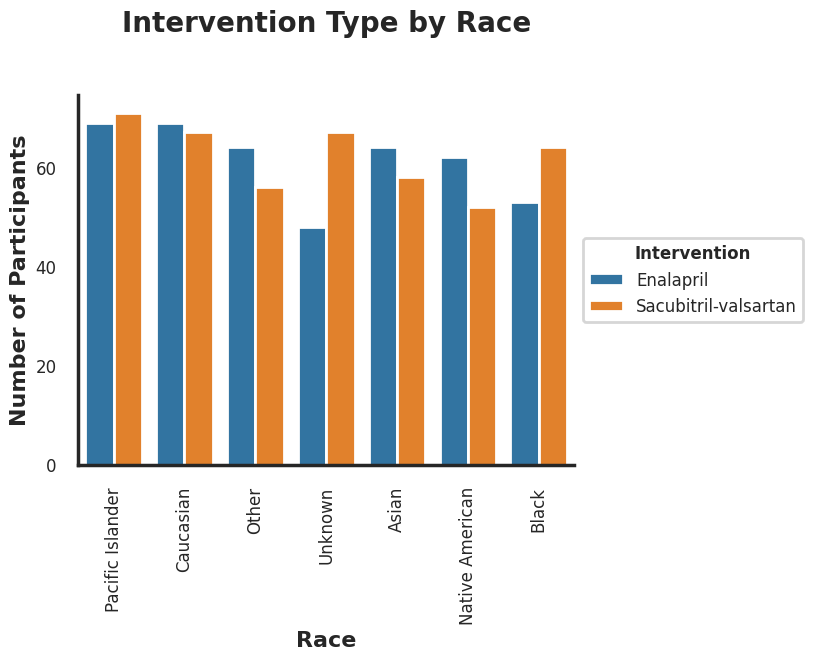

In [21]:
##Setting Background
sns.set_style("white")
sns.set_context("poster")

## Determining hue order
hueXOrder = ['Pacific Islander','Caucasian', 'Asian','Black','Native American','Unknown','Other']

#creating countplot for race in each intervention group
sns.countplot(data=Newdf, x='Race', hue='Group')

#despine
sns.despine()

#Editing legend position and font
legend=plt.legend(title="Intervention", loc='center left', bbox_to_anchor=(1, 0.5),fontsize=12)
legend.get_title().set_fontsize('12')
legend.get_title().set_weight("bold")

##Creating Title for the plot
plt.title("Intervention Type by Race",fontsize=20,fontweight='bold',y=1.15)

##changing tick font size
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

#Editing X and Y axis labels and font
plt.xlabel('Race',fontsize=16,fontweight='bold')
plt.ylabel('Number of Participants',fontsize=16, fontweight='bold')

##Saving figure
plt.savefig("/content/figures/Figure1_InterventionbyRace.pdf", bbox_inches='tight')

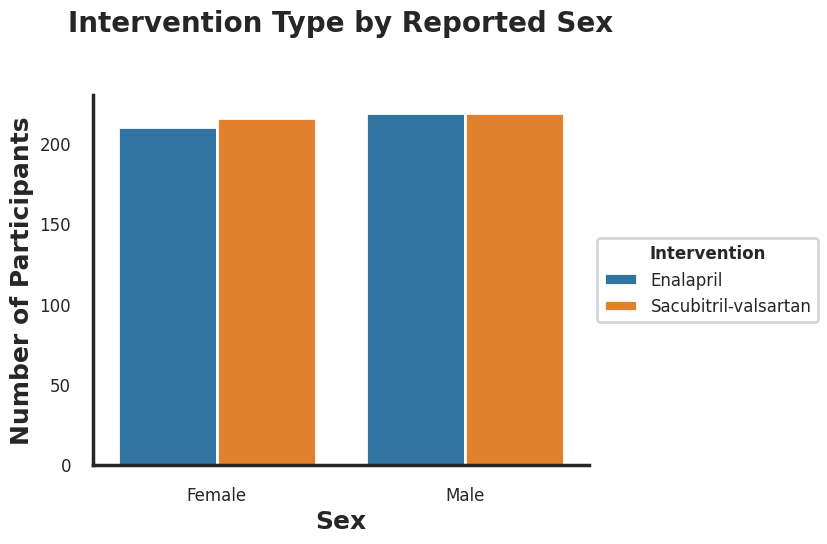

In [22]:
##Setting Background
sns.set_style("white")
sns.set_context("poster")

##Determining hue order for sex
hueSEXOrder = ["Male","Female"]

#creating countplot for sex in each intervention group
sns.countplot(data=Newdf, x='Sex', hue='Group')

sns.despine()

#Editing legend position and font
legend=plt.legend(title="Intervention", loc='center left', bbox_to_anchor=(1, 0.5),fontsize=12)
legend.get_title().set_fontsize('12')
legend.get_title().set_weight("bold")

##Creating Title for the plot
plt.title("Intervention Type by Reported Sex",fontsize=20,fontweight='bold',y=1.15)

##changing tick font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Editing X and Y axis labels and font
plt.xlabel("Sex",fontsize=18,fontweight='bold')
plt.ylabel('Number of Participants',fontsize=18, fontweight='bold')

##Saving Figure
plt.savefig("/content/figures/Figure2_InterventionbySex.pdf", bbox_inches='tight')

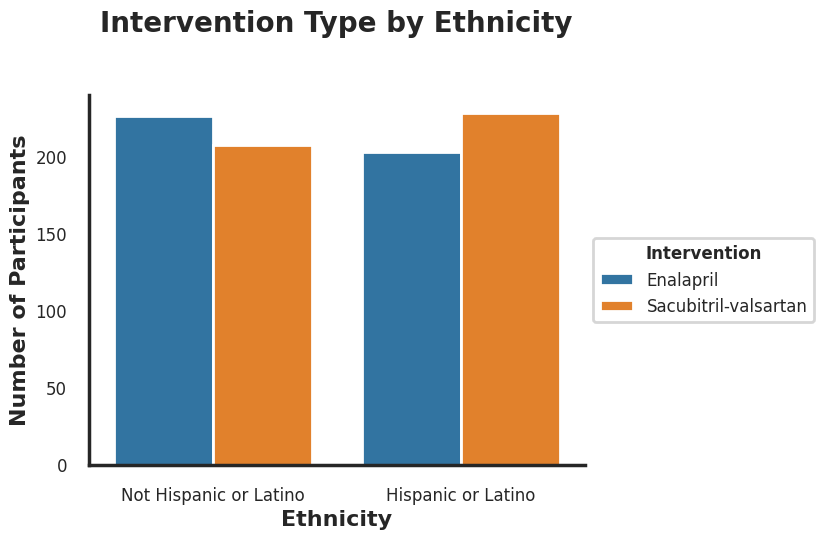

In [23]:
##Setting Background
sns.set_style("white")
sns.set_context("poster")

#defining hue order for ethnicity
hueethnicityOrder = ['Hispanic or Latino', "Not Hispanic or Latino"]

#creating countplot for ethnicity in each intervention group
sns.countplot(data=Newdf, x='Ethnicity', hue='Group')

sns.despine()

#Editing legend position and font
legend=plt.legend(title="Intervention", loc='center left', bbox_to_anchor=(1, 0.5),fontsize=12)
legend.get_title().set_fontsize('12')
legend.get_title().set_weight("bold")

##Creating Title for the plot
plt.title("Intervention Type by Ethnicity",fontsize=20,fontweight='bold',y=1.15)

##changing tick font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Editing X and Y axis labels and font
plt.xlabel('Ethnicity',fontsize=16,fontweight='bold')
plt.ylabel('Number of Participants',fontsize=16, fontweight='bold')

#Saving figure
plt.savefig("/content/figures/Figure3_InterventionbyEthnicity.pdf", bbox_inches='tight')

In [24]:
##editing README.md file for the figures directory
%%bash
cd /content/figures/
cat > /content/figures/README.md

Figure1_InterventionbyRace is a bargraph comparision showing the amount by race in each intervention group

Figure2_InterventionbySex is a bargraph comparision showing the amount by sex in each intervention group

Figure3_InterventionbyEthnicity is a bargraph comparision showing the amount by ehtnicity in each intervention group


###**Explore the efficacy of sacubitril/valsartan and enalapril at 4 weeks and 8 weeks (36 points)**
**Relational Data**
*   Follow the steps below to visualize NT-proBNP concentrations over time with a relational-type plot.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Styles

    ・Use one of Seaborn's Plot-Contexts

    ・Despine your plot
* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.

1) Subset the cleaned and filtered DataFrame into three smaller DataFrames containing the following columns (8 points):
*   Pre-treatment NT-proBNP & Intervention Group
*   Week 4 NT-proBNP & Intervention Group
*   Week 8 NT-proBNP & Intervention Group




In [25]:
#Manipulated clean data file
%%bash
mkdir /content/startingData/Manipulated_data/LinePlot_DF

In [26]:
%%bash
cd /content/startingData/Manipulated_data
cat > /content/startingData/Manipulated_data/README.md

NewDF+BMI.csv file contains the clean data with an additional column for BMI

LinePlot_DF folder (directory) contains all the Dataframe files and manipulations used to contruct the
Figure4_NT-proBNP_conc_over_time_lineplot.pdf

In [27]:
#Manipulated clean data file
%%bash
cd /content/startingData/Manipulated_data/LinePlot_DF
cat > /content/startingData/Manipulated_data/LinePlot_DF/README.md


In [28]:
#Creating Data frame 1 Pre-treatment NT-proBNP & Intervention Group
df1=Newdf[["Pre-treatment NT-proBNP (pg/mL)","Group"]].copy()
df1.head()

,Pre-treatment NT-proBNP (pg/mL),Group
0,8347.211,Enalapril
1,5343.904,Enalapril
2,6147.305,Enalapril
3,5400.806,Enalapril
4,6226.814,Enalapril


In [29]:
##creating a CSV file of the data
df1.to_csv("/content/startingData/Manipulated_data/LinePlot_DF/Pre-TreatmentData.csv", index=False)


In [30]:
##Creating Data frame 2 Week 4 NT-proBNP & Intervention Group
df2=Newdf[["Week 4 NT-proBNP (pg/mL)","Group"]].copy()
df2.head()

,Week 4 NT-proBNP (pg/mL),Group
0,6235.367,Enalapril
1,3991.896,Enalapril
2,4592.037,Enalapril
3,4034.402,Enalapril
4,4651.430,Enalapril


In [31]:
##creating a CSV file of the data
df2.to_csv("/content/startingData/Manipulated_data/LinePlot_DF/Week4Data.csv", index=False)

In [32]:
##Creating Data frame 3 Week 8 NT-proBNP & Intervention Group
df3=Newdf[["Week 8 NT-proBNP (pg/mL)","Group"]].copy()
df3.head()

,Week 8 NT-proBNP (pg/mL),Group
0,4657.819,Enalapril
1,2981.946,Enalapril
2,3430.252,Enalapril
3,3013.698,Enalapril
4,3474.618,Enalapril


In [33]:
##creating a CSV file of the data
df3.to_csv("/content/startingData/Manipulated_data/LinePlot_DF/Week8Data.csv", index=False)

2) Add a column to each of the three new DataFrames specifying each DataFrame's timepoint. The name of the column should be the same for each DataFrame (6 points).

In [34]:
df1.loc[:,"Timepoint"]="pre-treatment"
df1.head()

,Pre-treatment NT-proBNP (pg/mL),Group,Timepoint
0,8347.211,Enalapril,pre-treatment
1,5343.904,Enalapril,pre-treatment
2,6147.305,Enalapril,pre-treatment
3,5400.806,Enalapril,pre-treatment
4,6226.814,Enalapril,pre-treatment


In [35]:
##creating a CSV file of the data
df1.to_csv("/content/startingData/Manipulated_data/LinePlot_DF/PreTreatmentData+TIMEPOINT.csv", index=False)

In [36]:
df2.loc[:,"Timepoint"]="Week 4"
df2.head()

,Week 4 NT-proBNP (pg/mL),Group,Timepoint
0,6235.367,Enalapril,Week 4
1,3991.896,Enalapril,Week 4
2,4592.037,Enalapril,Week 4
3,4034.402,Enalapril,Week 4
4,4651.430,Enalapril,Week 4


In [37]:
##creating a CSV file of the data
df2.to_csv("/content/startingData/Manipulated_data/LinePlot_DF/Week4Data+TIMEPOINT.csv", index=False)

In [38]:
df3.loc[:,"Timepoint"]="Week 8"
df3.head()

,Week 8 NT-proBNP (pg/mL),Group,Timepoint
0,4657.819,Enalapril,Week 8
1,2981.946,Enalapril,Week 8
2,3430.252,Enalapril,Week 8
3,3013.698,Enalapril,Week 8
4,3474.618,Enalapril,Week 8


In [39]:
##creating a CSV file of the data
df3.to_csv("/content/startingData/Manipulated_data/LinePlot_DF/Week8Data+TIMEPOINT.csv", index=False)

3) Merge all three of the new DataFrames via the most appropriate method. (6 points)


In [40]:
#merging all three data frames into one
merged_df = pd.concat([df1, df2, df3], ignore_index=True)
merged_df

,Pre-treatment NT-proBNP (pg/mL),Group,Timepoint,Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL)
0,8347.211,Enalapril,pre-treatment,NaN,NaN
1,5343.904,Enalapril,pre-treatment,NaN,NaN
2,6147.305,Enalapril,pre-treatment,NaN,NaN
3,5400.806,Enalapril,pre-treatment,NaN,NaN
4,6226.814,Enalapril,pre-treatment,NaN,NaN
...,...,...,...,...,...
2587,NaN,Sacubitril-valsartan,Week 8,NaN,1706.638
2588,NaN,Sacubitril-valsartan,Week 8,NaN,1607.673
2589,NaN,Sacubitril-valsartan,Week 8,NaN,1771.319
2590,NaN,Sacubitril-valsartan,Week 8,NaN,2235.074


In [41]:
##creating a CSV file of the data
merged_df.to_csv("/content/startingData/Manipulated_data/LinePlot_DF/Merged_TimpointData.csv", index=False)

4 ) Fill in any NaNs in the merged DataFrame with the integer value 0. (2 points)

In [42]:
#Replacing all NaN values with 0 integer
merged_edit_df=merged_df.fillna(0)
merged_edit_df

,Pre-treatment NT-proBNP (pg/mL),Group,Timepoint,Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL)
0,8347.211,Enalapril,pre-treatment,0.0,0.000
1,5343.904,Enalapril,pre-treatment,0.0,0.000
2,6147.305,Enalapril,pre-treatment,0.0,0.000
3,5400.806,Enalapril,pre-treatment,0.0,0.000
4,6226.814,Enalapril,pre-treatment,0.0,0.000
...,...,...,...,...,...
2587,0.000,Sacubitril-valsartan,Week 8,0.0,1706.638
2588,0.000,Sacubitril-valsartan,Week 8,0.0,1607.673
2589,0.000,Sacubitril-valsartan,Week 8,0.0,1771.319
2590,0.000,Sacubitril-valsartan,Week 8,0.0,2235.074


In [43]:
##creating a CSV file of the data
merged_edit_df.to_csv("/content/startingData/Manipulated_data/LinePlot_DF/Merged_TimpointData_cleaned.csv", index=False)

5) Combine all the columns containing NT-proBNP concentration data into a new, single column. (6 points)

In [44]:
##check data for df1, df2 and df3 do not have any 0 values
value_count1=df1["Pre-treatment NT-proBNP (pg/mL)"].value_counts()
value_count2=df2["Week 4 NT-proBNP (pg/mL)"].value_counts()
value_count3=df3["Week 8 NT-proBNP (pg/mL)"].value_counts()

if (value_count1 == 0).any():
    print("data contains a 0")
else:
    print ("df1 does not contain 0")

if (value_count2 == 0).any():
    print("data contains a 0")
else:
    print ("df2 does not contain 0")

if (value_count2 == 0).any():
    print("data contains a 0")
else:
    print ("df2 does not contain 0")

df1 does not contain 0
df2 does not contain 0
df2 does not contain 0


In [45]:
merged_edit_df.loc[(merged_edit_df['Pre-treatment NT-proBNP (pg/mL)']!=0),"NT-proBNP (pg/mL)"]=merged_edit_df['Pre-treatment NT-proBNP (pg/mL)']
merged_edit_df.loc[(merged_edit_df['Week 4 NT-proBNP (pg/mL)']!=0),"NT-proBNP (pg/mL)"]=merged_edit_df['Week 4 NT-proBNP (pg/mL)']
merged_edit_df.loc[(merged_edit_df['Week 8 NT-proBNP (pg/mL)']!=0),"NT-proBNP (pg/mL)"]=merged_edit_df['Week 8 NT-proBNP (pg/mL)']
merged_edit_df



,Pre-treatment NT-proBNP (pg/mL),Group,Timepoint,Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),NT-proBNP (pg/mL)
0,8347.211,Enalapril,pre-treatment,0.0,0.000,8347.211
1,5343.904,Enalapril,pre-treatment,0.0,0.000,5343.904
2,6147.305,Enalapril,pre-treatment,0.0,0.000,6147.305
3,5400.806,Enalapril,pre-treatment,0.0,0.000,5400.806
4,6226.814,Enalapril,pre-treatment,0.0,0.000,6226.814
...,...,...,...,...,...,...
2587,0.000,Sacubitril-valsartan,Week 8,0.0,1706.638,1706.638
2588,0.000,Sacubitril-valsartan,Week 8,0.0,1607.673,1607.673
2589,0.000,Sacubitril-valsartan,Week 8,0.0,1771.319,1771.319
2590,0.000,Sacubitril-valsartan,Week 8,0.0,2235.074,2235.074


In [46]:
##creating a CSV file of the data
merged_edit_df.to_csv("/content/startingData/Manipulated_data/LinePlot_DF/Merged_TimpointData_Final.csv", index=False)

In [47]:
#Manipulated clean data file
%%bash
cd /content/startingData/Manipulated_data/LinePlot_DF
cat > /content/startingData/Manipulated_data/LinePlot_DF/README.md

Pre-TreamentData.csv is a dataframe containing the colunm for "Pre-treatment NT-proBNP (pg/mL)" and "Group" columns
from the NewDF+BMI.csv file. In code it is identified as df1 initially.

Week4Data.csv is a dataframe containing the colunm for "Week 4 NT-proBNP (pg/mL)" and "Group" columns
from the NewDF+BMI.csv file. In code it is identified as df1 initially.

Week8Data.csv is a dataframe containing the colunm for "Week 8t NT-proBNP (pg/mL)" and "Group" columns
from the NewDF+BMI.csv file. In code it is identified as df1 initially.

Pre-TreamentData_TIMEPOINT.csv, Week4Data_TIMEPOINT.csv, and Week8Data_TIMEPOINT.csv are the same as the files listed above but with an
extra column title "Timepoint" that has the dataframe fie title inmputed in that column.
(i.e. if the file says Pre-TreamentData_TIMEPOINT.csv then there is a new timepoitn column which is filled with "Pre-Treament")

Merged_TimpointData.csv is the merging of the dataframes contained in Pre-TreamentData_TIMEPOINT.csv, Week4Data_TIMEPOINT.csv, and Week8Data_TIMEPOINT.csv

Merged_TimpointData_cleaned.csv is the cleaned version to which all NaN values are replaced with 0 integer.

Merged_TimpointData_Final.csv is the dataframe that was used to construct Figure4_NT-proBNP_conc_over_time_lineplot.pdf

6) Use a line plot to graph NT-proBNP concentration over time, with Intervention Group seperated by hue. (8 points)

The arguements you pass to lineplot() should include:
*   `ci='sd'`
*   `err_style='bars'`
*   `marker="o"`



<ipython-input-48-237b69f9febb>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=merged_edit_df,x="Timepoint", y="NT-proBNP (pg/mL)", hue="Group", err_style="bars",ci="sd", marker="o")


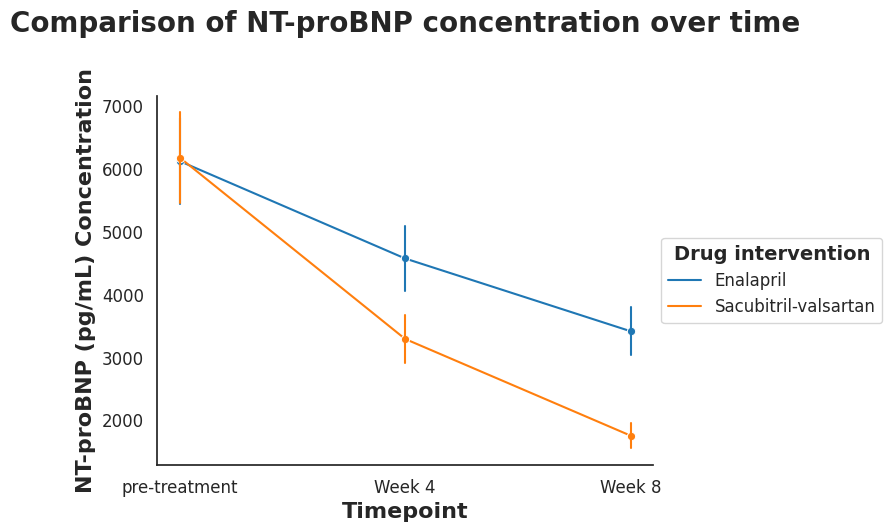

In [48]:
sns.set_style("white")
sns.set_context("notebook")

sns.lineplot(data=merged_edit_df,x="Timepoint", y="NT-proBNP (pg/mL)", hue="Group", err_style="bars",ci="sd", marker="o")

sns.despine()

#Editing legend position and font
legend=plt.legend(title="Drug intervention", loc='center left', bbox_to_anchor=(1, 0.5),fontsize=12)
legend.get_title().set_fontsize('14')
legend.get_title().set_weight("bold")

##Creating Title for the plot
plt.title("Comparison of NT-proBNP concentration over time",fontsize=20,fontweight='bold',y=1.15)

##changing tick font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Editing X and Y axis labels and font
plt.xlabel('Timepoint',fontsize=16,fontweight='bold')
plt.ylabel('NT-proBNP (pg/mL) Concentration',fontsize=16, fontweight='bold')

##Saving Figure
plt.savefig("/content/figures/Figure4_NT-proBNP_conc_over_time_lineplot.pdf", bbox_inches='tight')

In [49]:
##editing README.md file for the figures directory
%%bash
cd /content/figures/
cat > /content/figures/README.md

Figure1_InterventionbyRace is a bargraph comparision showing the amount by race in each intervention group

Figure2_InterventionbySex is a bargraph comparision showing the amount by sex in each intervention group

Figure3_InterventionbyEthnicity is a bargraph comparision showing the amount by ehtnicity in each intervention group

Figure4_NT-proBNP_conc_over_time_lineplot is a lineplot showing th concentration of NT-proBNP (pg/mL) over the three timepoints for each intevention group

###**Explore the efficacy of sacubitril/valsartan and enalapril for a  demographic (8 points)**

**Matrix Data**
*   Follow the steps below to produce a heatmap to visualize NT-proBNP concentration at Week 8 for some demographic of your choice. Intervention type must be an axis of the matrix data.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Contexts

* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.

1) Convert your categorical data into matrix data. (4 points)

In [50]:
grouped_df = Newdf.groupby(['Group', 'Age']).agg({'Week 8 NT-proBNP (pg/mL)': 'mean'}).reset_index()

# Pivoting to create a matrix
matrix_df = grouped_df.pivot('Group', 'Age', 'Week 8 NT-proBNP (pg/mL)')
matrix_df

<ipython-input-50-bb6d19842940>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix_df = grouped_df.pivot('Group', 'Age', 'Week 8 NT-proBNP (pg/mL)')


Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0
Group,,,,,,,,,,,,,,,,,,,,,
Enalapril,3529.951400,3287.1400,3314.097545,3494.035000,3304.969375,3548.369500,3250.447375,3468.410333,3185.139750,3560.116875,...,3266.0075,3538.996,3294.679400,3456.0615,3296.011600,3212.7645,3065.278000,3549.484000,3302.013818,3438.12200
Sacubitril-valsartan,1714.645417,1779.7406,1665.892923,1806.872333,1728.373778,1774.474818,1889.750167,1661.197400,1879.083667,1781.500333,...,1857.6848,1576.760,1782.055875,1580.3728,1880.911375,1677.4890,1775.068667,1663.551167,1720.959273,1765.30425


In [51]:
##creating a CSV file of the data
matrix_df.to_csv("/content/startingData/Manipulated_data/Heatmap_MatrixData.csv", index=False)

In [52]:
%%bash
cd /content/startingData/Manipulated_data
cat > /content/startingData/Manipulated_data/README.md

NewDF+BMI.csv file contains the clean data with an additional column for BMI

Heatmap_MatrixData.csv file contain the matrix data generated from the NewDF+BMI file to assist in generating a heatmap

LinePlot_DF folder (directory) contains all the Dataframe files and manipulations used to contruct the
Figure4_NT-proBNP_conc_over_time_lineplot.pdf



2) Plot a heatmap from your matrix data. It is okay if it does not look very complex. (4 points)

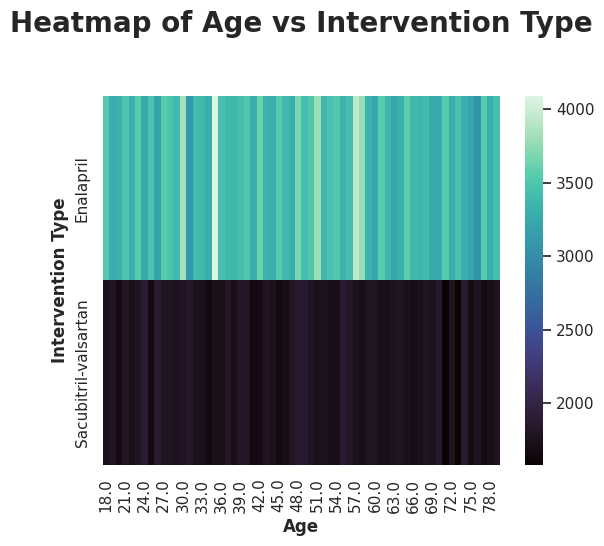

In [53]:
##Setting context and style
sns.set_style("white")
sns.set_context("notebook")

##Creating heatmap
sns.heatmap(data=matrix_df,cmap="mako")

##Creating Title for the plot
plt.title("Heatmap of Age vs Intervention Type",fontsize=20,fontweight='bold',y=1.15)

plt.ylabel("Intervention Type",fontweight="bold")
plt.xlabel("Age", fontweight="bold")


##Saving Figure
plt.savefig("/content/figures/Figure5_Age_Intervention_Heatmap.pdf", bbox_inches='tight')

In [54]:
##editing README.md file for the figures directory
%%bash
cd /content/figures/
cat > /content/figures/README.md

Figure1_InterventionbyRace.pdf is a bargraph comparision showing the amount by race in each intervention group

Figure2_InterventionbySex.pdf is a bargraph comparision showing the amount by sex in each intervention group

Figure3_InterventionbyEthnicity.pdf is a bargraph comparision showing the amount by ehtnicity in each intervention group

Figure4_NT-proBNP_conc_over_time_lineplot.pdf is a lineplot showing th concentration of NT-proBNP (pg/mL) over the three timepoints for each intevention group

Figure5_Age_Intervention_Heatmap.pdf is a heatmap generated comparing age and Intervention Type.

## **Statistical analysis (20 points)**

**Explore the safety of sacubitril/valsartan and enalapril in this stabilized acute heart failure patient population**

Please provide the following statistical measures for various characteristics, including BMI, and group the results by the intervention type (sacubitril/valsartan and enalapril):

**For Sacubitril/Valsartan Intervention:**

Mean and standard deviation (std) for each characteristic, including BMI.
Median for each characteristic, including BMI.

**For Enalapril Intervention:**

Mean and standard deviation (std) for each characteristic, including BMI.
Median for each characteristic, including BMI.  (4 points)

In [55]:
##verifying number of intervention types.
##i.e. how many Sacubitril-valsartan and Enalapril
value_counts = Newdf["Group"].value_counts()

print(value_counts)

Sacubitril-valsartan    435
Enalapril               429
Name: Group, dtype: int64


In [56]:
##Verifying columns for reference
print(Newdf.columns)

Index(['Age', 'Sex', 'Race', 'Ethnicity', 'Height (cm)', 'Weight (kg)',
       'Smoking history', 'Pre-treatment NT-proBNP (pg/mL)',
       'Week 4 NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)',
       'Pre-treatment BNP (pg/mL)', 'Prior use of ACEi/ARB',
       'Left ventricular ejection fraction (%)', 'Chronic renal insufficiency',
       'Group', 'Symptomatic hypotension', 'Hyperkalemia', 'Death', 'BMI'],
      dtype='object')


In [57]:
##New data frame containing numerical values for Sacubitril-valsartan
condition= Newdf["Group"]=="Sacubitril-valsartan"
selected_columns=["Age",'Height (cm)', 'Weight (kg)',
       'Smoking history', 'Pre-treatment NT-proBNP (pg/mL)',
       'Week 4 NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)',
       'Pre-treatment BNP (pg/mL)','Left ventricular ejection fraction (%)','BMI']

Sacub_Valsar_DF = Newdf.loc[condition, selected_columns]
Sacub_Valsar_DF


,Age,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Left ventricular ejection fraction (%),BMI
500,61.0,155.0,102.0,former,5826.214,3105.372,1655.163,1484.473,39.021,42.455775
501,74.0,157.0,64.0,current,5917.316,3153.929,1681.044,1333.764,33.521,25.964542
502,21.0,153.0,71.0,current,6091.085,3246.548,1730.410,1715.258,25.792,30.330215
503,67.0,189.0,80.0,current,5432.898,2895.735,1543.427,1880.864,30.812,22.395790
504,50.0,167.0,114.0,former,5845.697,3115.757,1660.698,1348.634,32.313,40.876331
...,...,...,...,...,...,...,...,...,...,...
994,62.0,207.0,81.0,never,6007.406,3201.947,1706.638,1301.497,32.520,18.903592
996,22.0,192.0,83.0,current,5659.047,3016.272,1607.673,1544.946,38.035,22.515191
997,65.0,207.0,85.0,former,6235.085,3323.300,1771.319,1818.102,35.753,19.837102
998,74.0,204.0,62.0,current,7867.514,4193.385,2235.074,1306.662,29.379,14.898116


In [58]:
##creating a CSV file of the data
Sacub_Valsar_DF.to_csv("/content/startingData/Manipulated_data/Sacubitril-valsartan_Dataframe.csv", index=False)

In [59]:
#The Mean, Median, and Standard Deviation for Sacubitril-valsartan Intervention
SVMean=Sacub_Valsar_DF.mean()
SVMedian=Sacub_Valsar_DF.median()
SVStandardDeviation=Sacub_Valsar_DF.std()

print("The Mean for Sacubitril/Valsartan Intervention is:")
print(SVMean)

print("\nThe Median for Sacubitril/Valsartan Intervention is:")
print(SVMedian)

print("\nThe Standard Deviation for Sacubitril/Valsartan Intervention is:")
print(SVStandardDeviation)

The Mean for Sacubitril/Valsartan Intervention is:
Age                                         48.452874
Height (cm)                                181.857471
Weight (kg)                                 79.068966
Pre-treatment NT-proBNP (pg/mL)           6179.680710
Week 4 NT-proBNP (pg/mL)                  3293.769828
Week 8 NT-proBNP (pg/mL)                  1755.579301
Pre-treatment BNP (pg/mL)                 1546.036740
Left ventricular ejection fraction (%)      30.911062
BMI                                         24.673102
dtype: float64

The Median for Sacubitril/Valsartan Intervention is:
Age                                         49.000000
Height (cm)                                183.000000
Weight (kg)                                 80.000000
Pre-treatment NT-proBNP (pg/mL)           6013.894000
Week 4 NT-proBNP (pg/mL)                  3205.406000
Week 8 NT-proBNP (pg/mL)                  1708.481000
Pre-treatment BNP (pg/mL)                 1507.478000
Left ventricular

<ipython-input-59-9c8fa8f2b7c2>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  SVMean=Sacub_Valsar_DF.mean()
<ipython-input-59-9c8fa8f2b7c2>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  SVMedian=Sacub_Valsar_DF.median()
<ipython-input-59-9c8fa8f2b7c2>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning

In [60]:
%%bash
cd /content/results/
cat > /content/results/Sacubitril-Valsartan_MeanMedianSD.txt

The Mean for Sacubitril/Valsartan Intervention is:
Age                                         48.452874
Height (cm)                                181.857471
Weight (kg)                                 79.068966
Pre-treatment NT-proBNP (pg/mL)           6179.680710
Week 4 NT-proBNP (pg/mL)                  3293.769828
Week 8 NT-proBNP (pg/mL)                  1755.579301
Pre-treatment BNP (pg/mL)                 1546.036740
Left ventricular ejection fraction (%)      30.911062
BMI                                         24.673102
dtype: float64

The Median for Sacubitril/Valsartan Intervention is:
Age                                         49.000000
Height (cm)                                183.000000
Weight (kg)                                 80.000000
Pre-treatment NT-proBNP (pg/mL)           6013.894000
Week 4 NT-proBNP (pg/mL)                  3205.406000
Week 8 NT-proBNP (pg/mL)                  1708.481000
Pre-treatment BNP (pg/mL)                 1507.478000
Left ventricular ejection fraction (%)      30.345000
BMI                                         23.384354
dtype: float64

The Standard Deviation for Sacubitril/Valsartan Intervention is:
Age                                        18.415818
Height (cm)                                18.000842
Weight (kg)                                22.852459
Pre-treatment NT-proBNP (pg/mL)           717.229481
Week 4 NT-proBNP (pg/mL)                  382.283300
Week 8 NT-proBNP (pg/mL)                  203.756984
Pre-treatment BNP (pg/mL)                 186.044647
Left ventricular ejection fraction (%)      3.881671
BMI                                         8.972476

In [61]:
##New data frame containing numerical values for Enalapril
condition= Newdf["Group"]=="Enalapril"
selected_columns=["Age",'Height (cm)', 'Weight (kg)',
       'Smoking history', 'Pre-treatment NT-proBNP (pg/mL)',
       'Week 4 NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)',
       'Pre-treatment BNP (pg/mL)','Left ventricular ejection fraction (%)','BMI']

Enalapril_DF = Newdf.loc[condition, selected_columns]
Enalapril_DF

,Age,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Left ventricular ejection fraction (%),BMI
0,58.0,156.0,81.0,current,8347.211,6235.367,4657.819,1465.851,32.984,33.284024
1,29.0,164.0,69.0,never,5343.904,3991.896,2981.946,1979.660,26.393,25.654372
2,37.0,158.0,107.0,never,6147.305,4592.037,3430.252,1476.762,25.579,42.861721
3,66.0,177.0,53.0,former,5400.806,4034.402,3013.698,1569.475,36.460,16.917233
4,66.0,207.0,86.0,current,6226.814,4651.430,3474.618,1616.645,33.842,20.070480
...,...,...,...,...,...,...,...,...,...,...
495,77.0,174.0,67.0,current,5626.116,4202.709,3139.424,1402.581,29.361,22.129740
496,48.0,163.0,88.0,former,6140.359,4586.848,3426.375,1480.906,27.638,33.121307
497,37.0,159.0,64.0,current,6135.068,4582.896,3423.423,1443.684,28.354,25.315454
498,23.0,156.0,68.0,former,6066.004,4531.305,3384.885,1386.422,30.180,27.942143


In [62]:
##creating a CSV file of the data
Enalapril_DF.to_csv("/content/startingData/Manipulated_data/Enalapril_Dataframe.csv", index=False)

In [93]:
%%bash
cd /content/startingData/Manipulated_data
cat > /content/startingData/Manipulated_data/README.md

NewDF+BMI.csv file contains the clean data with an additional column for BMI

Heatmap_MatrixData.csv file contain the matrix data generated from the NewDF+BMI file to assist in generating a heatmap

LinePlot_DF folder (directory) contains all the Dataframe files and manipulations used to contruct the
Figure4_NT-proBNP_conc_over_time_lineplot.pdf

Sacubitril-valsartan_Dataframe.csv and Enalapril_Dataframe.csv are dataframes created from the new dataframe, and contains data from the title intervention groups and columns with numerical values.
This data was used to come up with the mean, median, and standard deviation as well as used in the statisitcal analysis questions

In [64]:
##The mean median, and Standard deviation for Enalapril
EnMean=Enalapril_DF.mean()
EnMedian=Enalapril_DF.median()
EnStandardDeviation=Enalapril_DF.std()

print("The Mean for Enalapril Intervention is:")
print(EnMean)

print("\nThe Median for Enalapril Intervention is:")
print(EnMedian)

print("\nThe Standard Deviation for Enalapril Intervention is:")
print(EnStandardDeviation)

The Mean for Enalapril Intervention is:
Age                                         47.988345
Height (cm)                                181.037296
Weight (kg)                                 77.899767
Pre-treatment NT-proBNP (pg/mL)           6122.875683
Week 4 NT-proBNP (pg/mL)                  4573.788154
Week 8 NT-proBNP (pg/mL)                  3416.619776
Pre-treatment BNP (pg/mL)                 1538.408951
Left ventricular ejection fraction (%)      31.147079
BMI                                         24.577864
dtype: float64

The Median for Enalapril Intervention is:
Age                                         47.000000
Height (cm)                                181.000000
Weight (kg)                                 78.000000
Pre-treatment NT-proBNP (pg/mL)           6002.286000
Week 4 NT-proBNP (pg/mL)                  4483.708000
Week 8 NT-proBNP (pg/mL)                  3349.330000
Pre-treatment BNP (pg/mL)                 1507.052000
Left ventricular ejection fraction (%)

<ipython-input-64-f16431f1c9bc>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EnMean=Enalapril_DF.mean()
<ipython-input-64-f16431f1c9bc>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EnMedian=Enalapril_DF.median()
<ipython-input-64-f16431f1c9bc>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  En

In [65]:
%%bash
cd /content/results/
cat > /content/results/Enalapril_MeanMedianSD.txt

The Mean for Enalapril Intervention is:
Age                                         47.988345
Height (cm)                                181.037296
Weight (kg)                                 77.899767
Pre-treatment NT-proBNP (pg/mL)           6122.875683
Week 4 NT-proBNP (pg/mL)                  4573.788154
Week 8 NT-proBNP (pg/mL)                  3416.619776
Pre-treatment BNP (pg/mL)                 1538.408951
Left ventricular ejection fraction (%)      31.147079
BMI                                         24.577864
dtype: float64

The Median for Enalapril Intervention is:
Age                                         47.000000
Height (cm)                                181.000000
Weight (kg)                                 78.000000
Pre-treatment NT-proBNP (pg/mL)           6002.286000
Week 4 NT-proBNP (pg/mL)                  4483.708000
Week 8 NT-proBNP (pg/mL)                  3349.330000
Pre-treatment BNP (pg/mL)                 1507.052000
Left ventricular ejection fraction (%)      30.544000
BMI                                         23.233456
dtype: float64

The Standard Deviation for Enalapril Intervention is:
Age                                        17.839690
Height (cm)                                18.424854
Weight (kg)                                22.346814
Pre-treatment NT-proBNP (pg/mL)           682.428402
Week 4 NT-proBNP (pg/mL)                  509.774033
Week 8 NT-proBNP (pg/mL)                  380.801206
Pre-treatment BNP (pg/mL)                 184.630769
Left ventricular ejection fraction (%)      4.017975
BMI                                         8.844582

In [66]:
%%bash
cd /content/results/
cat > /content/results/README.md

Enalapril_MeanMedianSD.txt and Sacubitril-Valsartan_MeanMedianSD.txt files show the Mean Median and Standard Deviation for all the columns within each intevention group listed in file title


In [67]:
Sacub_Valsar_DF['Pre-treatment NT-proBNP (pg/mL)'].describe()

count     435.000000
mean     6179.680710
std       717.229481
min      5238.295000
25%      5640.104000
50%      6013.894000
75%      6574.696000
max      8613.588000
Name: Pre-treatment NT-proBNP (pg/mL), dtype: float64

In [68]:
Sacub_Valsar_DF['Week 4 NT-proBNP (pg/mL)'].describe()

count     435.000000
mean     3293.769828
std       382.283300
min      2792.011000
25%      3006.175500
50%      3205.406000
75%      3504.313000
max      4591.042000
Name: Week 4 NT-proBNP (pg/mL), dtype: float64

In [69]:
Sacub_Valsar_DF['Week 8 NT-proBNP (pg/mL)'].describe()

count     435.000000
mean     1755.579301
std       203.756984
min      1488.142000
25%      1602.291500
50%      1708.481000
75%      1867.798500
max      2447.025000
Name: Week 8 NT-proBNP (pg/mL), dtype: float64

What statistical test should be employed to analyze the effectiveness of the new heart failure medication formulations developed by two pharmaceutical companies, sacubitril and enalapril, with respect to their claims of reducing NT-proBNP levels? The claims state that sacubitril reduces NT-proBNP levels by an average of 3000 within 4 weeks and 2000 within 8 weeks, while enalapril reduces NT-proBNP levels by an average of 2500 within 4 weeks and 1500 within 8 weeks. A clinical trial was conducted using samples from both companies, and the objective is to determine which formulation is more effective.

Clearly state your hypotheses for the combinations of analyses and do the significance test accordingly:

1. For the sacubitril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

2. For the sacubitril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

3. For the enalapril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

4. For the enalapril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

5. Is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

6. Is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)

7. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

8. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)
   

In [70]:
#QUESTION 1
##Selecting columns from Sacub_Valsar_DF
SVpre_treatment_values = Sacub_Valsar_DF['Pre-treatment NT-proBNP (pg/mL)']
SVweek_4_values = Sacub_Valsar_DF['Week 4 NT-proBNP (pg/mL)']

# Perform the paired T-test
t_statisticSV4, p_valueSV4 = stats.ttest_rel(SVpre_treatment_values, SVweek_4_values)

# Print the results
print("Paired T-test results:")
print("T-statistic:", t_statisticSV4)
print("P-value:", p_valueSV4)

print("\nQuestion 1 Answer:")

# Check for statistical significance
if p_valueSV4 < 0.05:
    print("There is a significant difference between pre-treatment and Week 4 NT-proBNP levels for Sacubitril/Valsartan intervention.")
else:
    print("There is no significant difference between pre-treatment and Week 4 NT-proBNP levels for Sacubitril/Valsartan intervention.")

Paired T-test results:
T-statistic: 179.70183563105823
P-value: 0.0

Question 1 Answer:
There is a significant difference between pre-treatment and Week 4 NT-proBNP levels for Sacubitril/Valsartan intervention.


In [71]:
%%bash
cd /content/results/
cat > /content/results/Question1_results.txt

Question:1
For the sacubitril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

Hypothesis
Ho:There is no significant difference between pre-treatment and Week 4 NT-proBNP levels for Sacubitril/Valsartan intervention.
H1:There is a significant difference between pre-treatment and Week 4 NT-proBNP levels for Sacubitril/Valsartan intervention.

Sample size: 435

Test type: paired T-Test

Result:
Paired T-test results:
T-statistic: 179.70183563105823
P-value: 0.0

Question 1 Answer:
There is a significant difference between pre-treatment and Week 4 NT-proBNP levels for Sacubitril/Valsartan intervention.

In [72]:
#QUESTION 2

##Selecting columns from Sacub_Valsar_DF
SVpre_treatment_values = Sacub_Valsar_DF['Pre-treatment NT-proBNP (pg/mL)']
SVweek_8_values = Sacub_Valsar_DF['Week 8 NT-proBNP (pg/mL)']

# Perform the paired T-test
t_statisticSV8, p_valueSV8 = stats.ttest_rel(SVpre_treatment_values, SVweek_8_values)

# Print the results
print("Paired T-test results:")
print("T-statistic:", t_statisticSV8)
print("P-value:", p_valueSV8)

print("\nQuestion 2 Answer:")

# Check for statistical significance
if p_valueSV8 < 0.05:
    print("There is a significant difference between pre-treatment and Week 8 NT-proBNP levels for Sacubitril/Valsartan intervention.")
else:
    print("There is no significant difference between pre-treatment and Week 8 NT-proBNP levels Sacubitril/Valsartan intervention.")

Paired T-test results:
T-statistic: 179.70183624725638
P-value: 0.0

Question 2 Answer:
There is a significant difference between pre-treatment and Week 8 NT-proBNP levels for Sacubitril/Valsartan intervention.


In [73]:
%%bash
cd /content/results/
cat > /content/results/Question2_results.txt

Question:2
For the sacubitril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

Hypothesis
Ho:There is no significant difference between pre-treatment and Week 8 NT-proBNP levels for Sacubitril/Valsartan intervention.
H1:There is a significant difference between pre-treatment and Week 8 NT-proBNP levels for Sacubitril/Valsartan intervention.

Sample size: 435

Test type: paired T-Test

Paired T-test results:
T-statistic: 179.70183624725638
P-value: 0.0

Question 2 Answer:
There is a significant difference between pre-treatment and Week 8 NT-proBNP levels for Sacubitril/Valsartan intervention.

In [74]:
#QUESTION 3
##Selecting columns from Sacub_Valsar_DF
Enpre_treatment_values = Enalapril_DF['Pre-treatment NT-proBNP (pg/mL)']
Enweek_4_values = Enalapril_DF['Week 4 NT-proBNP (pg/mL)']

# Perform the paired T-test
t_statisticEn4, p_valueEn4 = stats.ttest_rel(Enpre_treatment_values, Enweek_4_values)

# Print the results
print("Paired T-test results:")
print("T-statistic:", t_statisticEn4)
print("P-value:", p_valueEn4)

print("\nQuestion 3 Answer:")

# Check for statistical significance
if p_valueEn4 < 0.05:
    print("There is a significant difference between pre-treatment and Week 4 NT-proBNP levels for Enalapril.")
else:
    print("There is no significant difference between pre-treatment and Week 4 NT-proBNP levels for Enalapril.")

Paired T-test results:
T-statistic: 185.83479491728963
P-value: 0.0

Question 3 Answer:
There is a significant difference between pre-treatment and Week 4 NT-proBNP levels for Enalapril.


In [75]:
%%bash
cd /content/results/
cat > /content/results/Question3_results.txt

Question:3
For the enalapril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

Sample size:429

Test type: Paired T-test

Ho:There is no significant difference between pre-treatment and Week 4 NT-proBNP levels for Enalapril intervention.
H1:There is a significant difference between pre-treatment and Week 4 NT-proBNP levels for Enalapril intervention.


Results:
Paired T-test results:
T-statistic: 185.83479491728963
P-value: 0.0

Question 3 Answer:
There is a significant difference between pre-treatment and Week 4 NT-proBNP levels for Enalapril.

In [76]:
#QUESTION 4
##Selecting columns from Sacub_Valsar_DF
Enpre_treatment_values = Enalapril_DF['Pre-treatment NT-proBNP (pg/mL)']
Enweek_8_values = Enalapril_DF['Week 8 NT-proBNP (pg/mL)']

# Perform the paired T-test
t_statisticEn8, p_valueEn8 = stats.ttest_rel(Enpre_treatment_values, Enweek_8_values)

# Print the results
print("Paired T-test results:")
print("T-statistic:", t_statisticEn8)
print("P-value:", p_valueEn8)

print("\nQuestion 4 Answer:")

# Check for statistical significance
if p_valueEn8 < 0.05:
    print("There is a significant difference between pre-treatment and Week 8 NT-proBNP levels for Enalapril.")
else:
    print("There is no significant difference between pre-treatment and Week 8 NT-proBNP levels for Enalapril.")

Paired T-test results:
T-statistic: 185.8347859357262
P-value: 0.0

Question 4 Answer:
There is a significant difference between pre-treatment and Week 8 NT-proBNP levels for Enalapril.


In [77]:
%%bash
cd /content/results/
cat > /content/results/Question4_results.txt

Question:4
For the enalapril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

Sample size:429

Test type: Paired T-test

Ho:There is no significant difference between pre-treatment and Week 8 NT-proBNP levels for Enalapril intervention.
H1:There is a significant difference between pre-treatment and Week 8 NT-proBNP levels for Enalapril intervention.

Results:
Paired T-test results:
T-statistic: 185.8347859357262
P-value: 0.0

Question 4 Answer:
There is a significant difference between pre-treatment and Week 8 NT-proBNP levels for Enalapril.

In [78]:
#Question 5

from scipy.stats import levene

SVweek4=Sacub_Valsar_DF['Week 4 NT-proBNP (pg/mL)']
ENweek4= Enalapril_DF['Week 4 NT-proBNP (pg/mL)']

LV1statistic, LV1p_value = levene(SVweek4, ENweek4)

print("Levene's test")
print(f"Levene's test statistic: {LV1statistic}")
print(f"P-value: {LV1p_value}")

# Check for statistical significance
if LV1p_value < 0.05:
    print("\nVariances are significantly different. Welch's T-test recomennded")
else:
    print("\nVariances are not significantly different. Independent T-Test recommended")

SVENweek4t_statistic, SVENweek4p_value = stats.ttest_ind(SVweek4,ENweek4 , equal_var=False)

print("\nWelch's T-test")
print(f"T-statistic: {SVENweek4t_statistic}")
print(f"P-value: {SVENweek4p_value}")

print("\nQuestion 5 answer:")
# Check for statistical significance
if SVENweek4p_value < 0.05:
    print("\nThere is a significant difference between NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril.")
else:
    print("\nThere is NOT a significant difference between NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril.")

Levene's test
Levene's test statistic: 18.591840781461848
P-value: 1.806120739407005e-05

Variances are significantly different. Welch's T-test recomennded

Welch's T-test
T-statistic: -41.711632296435845
P-value: 3.137544040782517e-202

Question 5 answer:

There is a significant difference between NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril.


In [79]:
%%bash
cd /content/results/
cat > /content/results/Question5_results.txt

Question:5
Is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

sample size sacubitril:435
sample size enelapril:429

Test type: two samples unpaired T-test (independent)

Ho:There is NOT a significant difference between NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)
H1:There is a significant difference between NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril).

Variance Check
Levene's test
Levene's test statistic: 18.591840781461848
P-value: 1.806120739407005e-05

Variances are significantly different. Welch's T-test recomended.

Welch's T-test
T-statistic: -41.711632296435845
P-value: 3.137544040782517e-202

Question 5 answer:

There is a significant difference between NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril).

In [80]:
#Question 6

from scipy.stats import levene

SVweek8=Sacub_Valsar_DF['Week 8 NT-proBNP (pg/mL)']
ENweek8= Enalapril_DF['Week 8 NT-proBNP (pg/mL)']

LV2statistic, LV2p_value = levene(SVweek8, ENweek8)

print("Levene's test")
print(f"Levene's test statistic: {LV2statistic}")
print(f"P-value: {LV2p_value}")

# Check for statistical significance
if LV2p_value < 0.05:
    print("\nVariances are significantly different. Welch's T-test recomennded")
else:
    print("\nVariances are not significantly different. Independent T-Test recommended")

SVENweek8t_statistic, SVENweek8p_value = stats.ttest_ind(SVweek8,ENweek8 , equal_var=False)

print("\nWelch's T-test")
print(f"T-statistic: {SVENweek8t_statistic}")
print(f"P-value: {SVENweek8p_value}")

print("\nQuestion 6 answer:")
# Check for statistical significance
if SVENweek8p_value < 0.05:
    print("\nThere is a significant difference between NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril.")
else:
    print("\nThere is NOT a significant difference between NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril.")

Levene's test
Levene's test statistic: 84.76467786898704
P-value: 2.491229595686279e-19

Variances are significantly different. Welch's T-test recomennded

Welch's T-test
T-statistic: -79.78225533293376
P-value: 0.0

Question 6 answer:

There is a significant difference between NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril.


In [81]:
%%bash
cd /content/results/
cat > /content/results/Question6_results.txt

Question:6
Is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)

sample size sacubitril:435
sample size enelapril:429

Test type: two samples unpaired T-test (independent)

Ho:There is NOT a significant difference between NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)
H1:There is a significant difference between NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril).


Variance Check
Levene's test
Levene's test statistic: 84.76467786898704
P-value: 2.491229595686279e-19

Variances are significantly different. Welch's T-test recomennded

Welch's T-test
T-statistic: -79.78225533293376
P-value: 0.0

Question 6 answer:

There is a significant difference between NT-proBNP levels at Week 8 between the two intervention groups (sacubitril and enalapril)

In [82]:
#creating new data frame for each intervention group for patients 60 or older

##New data frame containing numerical values for Enalapril
condition= Enalapril_DF["Age"]>=60
over60_columns=["Age",'Height (cm)', 'Weight (kg)',
       'Smoking history', 'Pre-treatment NT-proBNP (pg/mL)',
       'Week 4 NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)',
       'Pre-treatment BNP (pg/mL)','Left ventricular ejection fraction (%)','BMI']

Enalapril_DF60plus = Enalapril_DF.loc[condition, over60_columns]
Enalapril_DF60plus

,Age,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Left ventricular ejection fraction (%),BMI
3,66.0,177.0,53.0,former,5400.806,4034.402,3013.698,1569.475,36.460,16.917233
4,66.0,207.0,86.0,current,6226.814,4651.430,3474.618,1616.645,33.842,20.070480
6,70.0,157.0,98.0,former,5518.947,4122.653,3079.622,1383.184,39.462,39.758205
9,78.0,206.0,46.0,current,5434.849,4059.832,3032.695,1398.287,31.903,10.839853
14,68.0,185.0,93.0,former,6582.599,4917.201,3673.149,1373.453,39.185,27.173119
...,...,...,...,...,...,...,...,...,...,...
480,78.0,211.0,79.0,current,5981.732,4468.354,3337.860,1525.717,36.863,17.744435
482,75.0,182.0,69.0,current,5964.746,4455.665,3328.382,1345.706,27.593,20.830818
487,63.0,161.0,76.0,current,5274.585,3940.115,2943.266,1532.899,29.062,29.319856
495,77.0,174.0,67.0,current,5626.116,4202.709,3139.424,1402.581,29.361,22.129740


In [83]:
condition= Sacub_Valsar_DF["Age"]>=60
SVover60_columns=["Age",'Height (cm)', 'Weight (kg)',
       'Smoking history', 'Pre-treatment NT-proBNP (pg/mL)',
       'Week 4 NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)',
       'Pre-treatment BNP (pg/mL)','Left ventricular ejection fraction (%)','BMI']

Sacub_Valsar_DF60plus = Sacub_Valsar_DF.loc[condition, over60_columns]
Sacub_Valsar_DF60plus

,Age,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Left ventricular ejection fraction (%),BMI
500,61.0,155.0,102.0,former,5826.214,3105.372,1655.163,1484.473,39.021,42.455775
501,74.0,157.0,64.0,current,5917.316,3153.929,1681.044,1333.764,33.521,25.964542
503,67.0,189.0,80.0,current,5432.898,2895.735,1543.427,1880.864,30.812,22.395790
510,63.0,206.0,86.0,never,6816.455,3633.171,1936.480,1318.747,31.072,20.265812
511,60.0,191.0,118.0,never,7086.640,3777.179,2013.236,1457.771,27.705,32.345605
...,...,...,...,...,...,...,...,...,...,...
991,66.0,189.0,49.0,former,5677.724,3026.227,1612.979,1350.992,30.513,13.717421
994,62.0,207.0,81.0,never,6007.406,3201.947,1706.638,1301.497,32.520,18.903592
997,65.0,207.0,85.0,former,6235.085,3323.300,1771.319,1818.102,35.753,19.837102
998,74.0,204.0,62.0,current,7867.514,4193.385,2235.074,1306.662,29.379,14.898116


In [84]:
#Question 7

from scipy.stats import levene

SV60week4=Sacub_Valsar_DF60plus['Week 4 NT-proBNP (pg/mL)']
EN60week4=Enalapril_DF60plus['Week 4 NT-proBNP (pg/mL)']

LV4statistic, LV4p_value = levene(SV60week4, EN60week4)

print("Levene's test")
print(f"Levene's test statistic: {LV4statistic}")
print(f"P-value: {LV4p_value}")

# Check for statistical significance
if LV4p_value < 0.05:
    print("\nVariances are significantly different. Welch's T-test recomennded")
else:
    print("\nVariances are not significantly different. Independent T-Test recommended")

SVEN60week4t_statistic, SVEN60week4p_value = stats.ttest_ind(SV60week4,EN60week4 , equal_var=False)

print("\nWelch's T-test")
print(f"T-statistic: {SVEN60week4t_statistic}")
print(f"P-value: {SVEN60week4p_value}")

print("\nQuestion 7 answer:")
# Check for statistical significance
if SVEN60week4p_value < 0.05:
    print("\nThere is a significant difference between NT-proBNP levels at Week 4 between the two intervention groups (sacubitril and enalapril.")
else:
    print("\nThere is NOT a significant difference between NT-proBNP levels at Week 4 between the two intervention groups (sacubitril and enalapril.")

Levene's test
Levene's test statistic: 2.06628318411199
P-value: 0.15172498639444046

Variances are not significantly different. Independent T-Test recommended

Welch's T-test
T-statistic: -24.726381462552123
P-value: 1.3018442716591837e-71

Question 7 answer:

There is a significant difference between NT-proBNP levels at Week 4 between the two intervention groups (sacubitril and enalapril.


In [85]:
%%bash
cd /content/results/
cat > /content/results/Question7_results.txt
Question 7
Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

sample size sacubitril:140
sample size enelapril:137

Test type: 2 sample unpaired

Ho:There is NOT a significant difference between NT-proBNP levels at Week 4 between the two intervention groups (sacubitril and enalapril).
H1:There is a significant difference between NT-proBNP levels at Week 4 between the two intervention groups (sacubitril and enalapril).

Levene's test
Levene's test statistic: 2.06628318411199
P-value: 0.15172498639444046

Variances are not significantly different. Independent T-Test recommended

Welch's T-test
T-statistic: -24.726381462552123
P-value: 1.3018442716591837e-71

Question 7 answer:

There is a significant difference between NT-proBNP levels at Week 4 between the two intervention groups (sacubitril and enalapril).

In [86]:
#Question 8

from scipy.stats import levene

SV60week8=Sacub_Valsar_DF60plus['Week 8 NT-proBNP (pg/mL)']
EN60week8=Enalapril_DF60plus['Week 8 NT-proBNP (pg/mL)']

LV3statistic, LV3p_value = levene(SV60week8, EN60week8)

print("Levene's test")
print(f"Levene's test statistic: {LV3statistic}")
print(f"P-value: {LV3p_value}")

# Check for statistical significance
if LV3p_value < 0.05:
    print("\nVariances are significantly different. Welch's T-test recomennded")
else:
    print("\nVariances are not significantly different. Independent T-Test recommended")

SVEN60week8t_statistic, SVEN60week8p_value = stats.ttest_ind(SV60week8,EN60week8 , equal_var=False)

print("\nWelch's T-test")
print(f"T-statistic: {SVEN60week8t_statistic}")
print(f"P-value: {SVEN60week8p_value}")

print("\nQuestion 8 answer:")
# Check for statistical significance
if SVEN60week8p_value < 0.05:
    print("\nThere is a significant difference between NT-proBNP levels at Week 8 between the two intervention groups (sacubitril and enalapril).")
else:
    print("\nThere is NOT a significant difference between NT-proBNP levels at Week 8 between the two intervention groups (sacubitril and enalapril).")

Levene's test
Levene's test statistic: 20.684500164234596
P-value: 8.128012947184143e-06

Variances are significantly different. Welch's T-test recomennded

Welch's T-test
T-statistic: -49.39255253117414
P-value: 2.0948711041364107e-126

Question 8 answer:

There is a significant difference between NT-proBNP levels at Week 8 between the two intervention groups (sacubitril and enalapril).


In [87]:
%%bash
cd /content/results/
cat > /content/results/Question8_results.txt

Question:

Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)

sample size sacubitril:140
sample size enelapril:137

Test type: 2 sample unpaired

Ho:There is NOT a significant difference between NT-proBNP levels at Week 8 between the two intervention groups (sacubitril and enalapril).
H1:There is a significant difference between NT-proBNP levels at Week 8 between the two intervention groups (sacubitril and enalapril).

Levene's test
Levene's test statistic: 20.684500164234596
P-value: 8.128012947184143e-06

Variances are significantly different. Welch's T-test recomennded

Welch's T-test
T-statistic: -49.39255253117414
P-value: 2.0948711041364107e-126

Question 8 answer:

There is a significant difference between NT-proBNP levels at Week 8 between the two intervention groups (sacubitril and enalapril).

Is there a statistically significant difference between the pre-treatment NT-proBNP and week 4 NT-proBNP, and between baseline and week 8 NT-proBNP in sacubitril/valsartan and enalapril groups? (2 points)

Yes, there is a statistically significant difference between the pre-treatment NT-proBNP and week 4 NT-proBNP, and between baseline and week 8 NT-proBNP in sacubitril/valsartan and enalapril groups.

In [88]:
import numpy as np
from scipy import stats

# SV comparisons
SVpre_treatment_values = Sacub_Valsar_DF['Pre-treatment NT-proBNP (pg/mL)']
SVweek_4_values = Sacub_Valsar_DF['Week 4 NT-proBNP (pg/mL)']
SVweek_8_values = Sacub_Valsar_DF['Week 8 NT-proBNP (pg/mL)']

# En comparisons
Enpre_treatment_values = Enalapril_DF['Pre-treatment NT-proBNP (pg/mL)']
Enweek_4_values = Enalapril_DF['Week 4 NT-proBNP (pg/mL)']
Enweek_8_values = Enalapril_DF['Week 8 NT-proBNP (pg/mL)']

# Perform paired t-tests within each group
t_statistic_SV4, p_value_SV4 = stats.ttest_rel(SVpre_treatment_values, SVweek_4_values)
t_statistic_SV8, p_value_SV8 = stats.ttest_rel(SVpre_treatment_values, SVweek_8_values)

t_statistic_En4, p_value_En4 = stats.ttest_rel(Enpre_treatment_values, Enweek_4_values)
t_statistic_En8, p_value_En8 = stats.ttest_rel(Enpre_treatment_values, Enweek_8_values)

# Print the results for paired tests within each group
print("Paired T-test results within Sacubitril/Valsartan:")
print("Week 4 - T-statistic:", t_statistic_SV4)
print("Week 4 - P-value:", p_value_SV4)
print("Week 8 - T-statistic:", t_statistic_SV8)
print("Week 8 - P-value:", p_value_SV8)

print("\nPaired T-test results within Enalapril:")
print("Week 4 - T-statistic:", t_statistic_En4)
print("Week 4 - P-value:", p_value_En4)
print("Week 8 - T-statistic:", t_statistic_En8)
print("Week 8 - P-value:", p_value_En8)

# Perform independent t-tests between Sacubitril/Valsartan and Enalapril for each time point
t_statistic_4, p_value_4 = stats.ttest_ind(SVweek_4_values, Enweek_4_values, equal_var=False)
t_statistic_8, p_value_8 = stats.ttest_ind(SVweek_8_values, Enweek_8_values, equal_var=False)

# Print the results for comparisons between SV and En
print("\nIndependent T-test results between Sacubitril/Valsartan and Enalapril:")
print("Week 4 - T-statistic:", t_statistic_4)
print("Week 4 - P-value:", p_value_4)
print("Week 8 - T-statistic:", t_statistic_8)
print("Week 8 - P-value:", p_value_8)

# Perform independent t-tests between intervention groups for pre-treatment values
t_statistic_pre, p_value_pre = stats.ttest_ind(SVpre_treatment_values, Enpre_treatment_values, equal_var=False)

# Print the results for comparisons between SV and En for pre-treatment values
print("\nIndependent T-test results for pre-treatment values between Sacubitril/Valsartan and Enalapril:")
print("T-statistic:", t_statistic_pre)
print("P-value:", p_value_pre)

# Check for statistical significance
if p_value_4 < 0.05:
    print("\nThere is a significant difference between Sacubitril/Valsartan and Enalapril for Week 4 NT-proBNP levels.")
else:
    print("\nThere is no significant difference between Sacubitril/Valsartan and Enalapril for Week 4 NT-proBNP levels.")

if p_value_8 < 0.05:
    print("There is a significant difference between Sacubitril/Valsartan and Enalapril for Week 8 NT-proBNP levels.")
else:
    print("There is no significant difference between Sacubitril/Valsartan and Enalapril for Week 8 NT-proBNP levels.")

# Check for statistical significance for pre-treatment values
if p_value_pre < 0.05:
    print("There is a significant difference between Sacubitril/Valsartan and Enalapril for pre-treatment NT-proBNP levels.")
else:
    print("There is no significant difference between Sacubitril/Valsartan and Enalapril for pre-treatment NT-proBNP levels.")

Paired T-test results within Sacubitril/Valsartan:
Week 4 - T-statistic: 179.70183563105823
Week 4 - P-value: 0.0
Week 8 - T-statistic: 179.70183624725638
Week 8 - P-value: 0.0

Paired T-test results within Enalapril:
Week 4 - T-statistic: 185.83479491728963
Week 4 - P-value: 0.0
Week 8 - T-statistic: 185.8347859357262
Week 8 - P-value: 0.0

Independent T-test results between Sacubitril/Valsartan and Enalapril:
Week 4 - T-statistic: -41.711632296435845
Week 4 - P-value: 3.137544040782517e-202
Week 8 - T-statistic: -79.78225533293376
Week 8 - P-value: 0.0

Independent T-test results for pre-treatment values between Sacubitril/Valsartan and Enalapril:
T-statistic: 1.1927571533991683
P-value: 0.2332931277840902

There is a significant difference between Sacubitril/Valsartan and Enalapril for Week 4 NT-proBNP levels.
There is a significant difference between Sacubitril/Valsartan and Enalapril for Week 8 NT-proBNP levels.
There is no significant difference between Sacubitril/Valsartan and E

In [89]:
%%bash
cd /content/results/
cat > /content/results/final_conclusion.txt

Is there a statistically significant difference between the pre-treatment NT-proBNP and week 4 NT-proBNP, and between baseline and week 8 NT-proBNP in sacubitril/valsartan and enalapril groups?

Paired T-test results within Sacubitril/Valsartan:
Week 4 - T-statistic: 179.70183563105823
Week 4 - P-value: 0.0
Week 8 - T-statistic: 179.70183624725638
Week 8 - P-value: 0.0

Paired T-test results within Enalapril:
Week 4 - T-statistic: 185.83479491728963
Week 4 - P-value: 0.0
Week 8 - T-statistic: 185.8347859357262
Week 8 - P-value: 0.0

Independent T-test results between Sacubitril/Valsartan and Enalapril:
Week 4 - T-statistic: -41.711632296435845
Week 4 - P-value: 3.137544040782517e-202
Week 8 - T-statistic: -79.78225533293376
Week 8 - P-value: 0.0

Independent T-test results for pre-treatment values between Sacubitril/Valsartan and Enalapril:
T-statistic: 1.1927571533991683
P-value: 0.2332931277840902

There is a significant difference between Sacubitril/Valsartan and Enalapril for Week 4 NT-proBNP levels.
There is a significant difference between Sacubitril/Valsartan and Enalapril for Week 8 NT-proBNP levels.
There is no significant difference between Sacubitril/Valsartan and Enalapril for pre-treatment NT-proBNP levels.

Yes, there is a statistically significant difference between the pre-treatment NT-proBNP and week 4 NT-proBNP, and between baseline and week 8 NT-proBNP in sacubitril/valsartan and enalapril groups.

In [90]:
%%bash
cd /content/results/
cat > /content/results/README.md

Enalapril_MeanMedianSD.txt and Sacubitril-Valsartan_MeanMedianSD.txt files show the Mean Median and Standard Deviation for all the columns within each intevention group listed in file title

Each Question.txt file shows the statistical results and conclusions for the questions listed below.

Question1: For the sacubitril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

Question2:For the sacubitril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

Question3:For the enalapril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

Question4:For the enalapril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

Question5:Is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

Question6:Is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)

Question7:Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

Question8:Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)


final_conclusion.txt answers the following question:
Is there a statistically significant difference between the pre-treatment NT-proBNP and week 4 NT-proBNP, and between baseline and week 8 NT-proBNP in sacubitril/valsartan and enalapril groups? (2 points)

In [105]:
%%bash
cd /content/code/
cat > /content/code/README.md

CPXT501_Final_project.ipynb contains the notebook with all the code that was utilized to create all files and directories in this project.

In [91]:
%%bash
git init

Initialized empty Git repository in /content/.git/


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>


In [94]:
%%bash
git config --global user.email "amajauregui@gmail.com"
git config --global user.name "Ashley Jauregui"

In [95]:
%%bash
cat > .gitignore

In [96]:
%%bash
git add -A

In [97]:
%%bash
git commit -m "Created a directory for GitHub."

[master (root-commit) 32a11f7] Created a directory for GitHub.
 53 files changed, 17851 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/logs/2023.12.04/14.20.49.627769.log
 create mode 100644 .config/logs/2023.12.04/14.23.49.652015.log
 create mode 100644 .config/logs/2023.12.04/14.23.59.638040.log
 create mode 100644 .config/logs/2023.12.04/14.26.48.840108.log
 create mode 100644 .config/logs/2023.12.04/14.26.59.279282.log
 create mode 100644 .config/logs/2023.12.04/14.27.00.107426.log
 create mode 100644 .gitignore
 create mode 100644 README.md
 create mode 100644 code/README.md
 create mode 100644 figures/Figure1_I

In [98]:
%%bash
ssh-keygen -t ed25519 -C 'amajauregui@gmail.com' -f ~/.ssh/id_ed25519 -P ''
cat > ~/.ssh/config
Host *
  AddKeysToAgent yes
  IdentityFile ~/.ssh/id_ed25519

Generating public/private ed25519 key pair.
Your identification has been saved in /root/.ssh/id_ed25519
Your public key has been saved in /root/.ssh/id_ed25519.pub
The key fingerprint is:
SHA256:P0/mtOi9uU1u6TY6J78nqHU17Dq8U4PH3LxSZKjtdZc amajauregui@gmail.com
The key's randomart image is:
+--[ED25519 256]--+
|                 |
|                 |
|              .  |
|             ..o |
|        S   o *++|
|         . . o.E*|
|          o B.Bo=|
|           @+&O..|
|         .+.X#@= |
+----[SHA256]-----+


Created directory '/root/.ssh'.


In [99]:
%%bash
eval "$(ssh-agent -s)"
ssh-add ~/.ssh/id_ed25519

Agent pid 15815


Identity added: /root/.ssh/id_ed25519 (amajauregui@gmail.com)


In [100]:
%%bash
cat ~/.ssh/id_ed25519.pub

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIN7XXJvP2bwoxenEypKwgr4gGbTqFogBzAywrJNTniQV amajauregui@gmail.com


In [101]:
%%bash
ssh -o "StrictHostKeyChecking no" -T git@github.com | exit 0

Hi amajauregui! You've successfully authenticated, but GitHub does not provide shell access.


In [ ]:
git remote add origin git@github.com:amajauregui/CXPT501_Final_Project.git
  git branch -M main
  git push -u origin main